## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report 

## The IRIS Dataset

- Collected by British biologist and statistician Ronald Fisher in 1936.
- Commonly used for classification examples - predict the species of iris flower based on measurements.
- It includes three iris species with 50 samples each as well as some properties about each flower. 
- One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.
- The dataset consists of 150 samples of iris flowers, divided into 3 species with 50 samples each.
- Species: Iris setosa, Iris versicolor, Iris virginica
- Each sample has 4 numerical features: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
- The target variable is the species of the iris flower, encoded as integers: Iris setosa (0), Iris versicolor (1), Iris virginica (2)

## Loading Dataset

In [2]:
from sklearn import datasets 

# Load data with only two classes and two features 
iris = datasets.load_iris()  

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Handling Linearly Separable Classes

In [5]:
# Selecting only two classes (as third class is not linearly separable)
# and two features (so we can plot the graph) 
features = iris.data[:100,:2] 
target = iris.target[:100] 

In [6]:
features

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [7]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Standardize features 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
features_standardized = scaler.fit_transform(features) 

In [9]:
features_standardized

array([[-5.81065904e-01,  8.41837140e-01],
       [-8.94308978e-01, -2.07835104e-01],
       [-1.20755205e+00,  2.12033793e-01],
       [-1.36417359e+00,  2.09934449e-03],
       [-7.37687441e-01,  1.05177159e+00],
       [-1.11201292e-01,  1.68157493e+00],
       [-1.36417359e+00,  6.31902691e-01],
       [-7.37687441e-01,  6.31902691e-01],
       [-1.67741667e+00, -4.17769553e-01],
       [-8.94308978e-01,  2.09934449e-03],
       [-1.11201292e-01,  1.26170604e+00],
       [-1.05093052e+00,  6.31902691e-01],
       [-1.05093052e+00, -2.07835104e-01],
       [-1.83403820e+00, -2.07835104e-01],
       [ 5.15284858e-01,  1.89150938e+00],
       [ 3.58663321e-01,  2.73124718e+00],
       [-1.11201292e-01,  1.68157493e+00],
       [-5.81065904e-01,  8.41837140e-01],
       [ 3.58663321e-01,  1.47164049e+00],
       [-5.81065904e-01,  1.47164049e+00],
       [-1.11201292e-01,  6.31902691e-01],
       [-5.81065904e-01,  1.26170604e+00],
       [-1.36417359e+00,  1.05177159e+00],
       [-5.

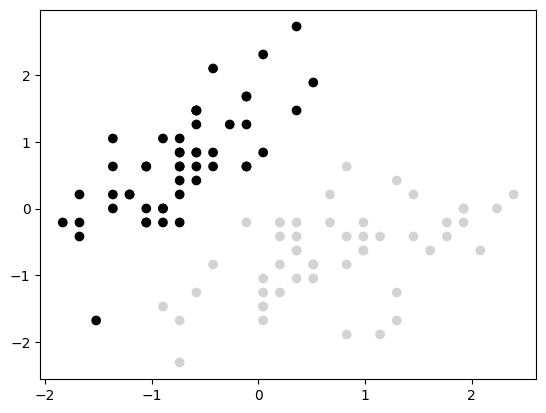

In [10]:
# Plot data points and color using their class - state space diagram
color = ["black" if c == 0 else "lightgrey" for c in target] 
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

In [11]:
from sklearn.svm import LinearSVC

# Create support vector classifier 
svc = LinearSVC(C=1.0) 
# Train model 
model = svc.fit(features_standardized, target)

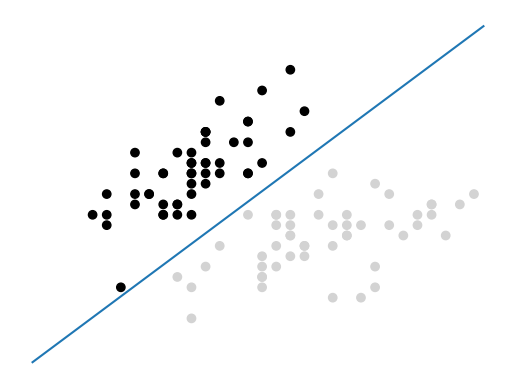

In [12]:
# Create the hyperplane 
w = svc.coef_[0] 
a = -w[0] / w[1]  # w[0] and w[1] are associated weights of the two features
xx = np.linspace(-2.5, 2.5) 
yy = a * xx - (svc.intercept_[0]) / w[1] 

# Plot the hyperplane 
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)
plt.plot(xx, yy) 
plt.axis("off"), plt.show();

In [13]:
# Create new observation 
new_observation = [[ -2, 3]] 
# Predict class of new observation 
svc.predict(new_observation) 

array([0])

## Handling Linearly Inseparable Classes using Kernels

### Generating Linearly Inseparable Data

In [14]:
# # Set randomization seed
# np.random.seed(0)  
# # Generate two features 
# features_ = np.random.randn(200, 2) 
# # Use a XOR gate to generate linearly inseparable classes 
# target_xor = np.logical_xor(features_[:, 0] > 0, features_[:, 1] > 0) 
# target_ = np.where(target_xor, 0, 1) 

In [15]:
features_ = iris.data[:150]
target_ = iris.target[:150] 
features_ = scaler.fit_transform(features_) 


In [16]:
features_

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Q2. 

### Using Linear Kernel

In [17]:
from sklearn.svm import SVC 
svc_linear = SVC(kernel="linear", random_state=0, C=1) 
model_linear=svc_linear.fit(features_, target_)
target_pred_linear = model_linear.predict(features_) 
target_pred_linear
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_linear)*100)+"%") 
print(confusion_matrix(target_,target_pred_linear))  
target_names = ['class 0', 'class 1', 'class 2'] 
print(classification_report(target_,target_pred_linear, target_names=target_names)) 

The accuracy is 96.66666666666667%
[[50  0  0]
 [ 0 46  4]
 [ 0  1 49]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.98      0.92      0.95        50
     class 2       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Using RBF Kernel

In [18]:
svc_rbf = SVC(kernel="rbf", random_state=0, gamma=1, C=1) 
model_svc=svc_rbf.fit(features_, target_) 
target_pred_rbf = model_svc.predict(features_) 
target_pred_rbf
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_rbf)*100)+"%") 
print(confusion_matrix(target_,target_pred_rbf))  
target_names = ['class 0', 'class 1', 'class 2'] 
print(classification_report(target_,target_pred_rbf, target_names=target_names))

The accuracy is 98.66666666666667%
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.98      0.98      0.98        50
     class 2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



### Using Polynomial Kernel

In [19]:
svc_polynomial = SVC(kernel="poly", C=1) 
model2_svc=svc_polynomial.fit(features_, target_) 
target_pred_poly = model2_svc.predict(features_) 
target_pred_poly
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_poly)*100)+"%") 
print(confusion_matrix(target_,target_pred_poly))  
target_names = ['class 0', 'class 1', 'class 2'] 
print(classification_report(target_,target_pred_poly, target_names=target_names)) 

The accuracy is 95.33333333333334%
[[50  0  0]
 [ 0 50  0]
 [ 0  7 43]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.88      1.00      0.93        50
     class 2       1.00      0.86      0.92        50

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150



## Q3.

### RBF Model 1 with C= 0.1

In [20]:
svc_rbf = SVC(kernel="rbf", random_state=0, gamma=1, C=0.1) 
model_svc=svc_rbf.fit(features_, target_) 
target_pred_rbf = model_svc.predict(features_) 
target_pred_rbf
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_rbf)*100)+"%") 
print(confusion_matrix(target_,target_pred_rbf))  
target_names = ['class 0', 'class 1', 'class 2'] 
print(classification_report(target_,target_pred_rbf, target_names=target_names))

The accuracy is 96.66666666666667%
[[49  0  1]
 [ 0 49  1]
 [ 0  3 47]]
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99        50
     class 1       0.94      0.98      0.96        50
     class 2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### RBF Model 2 with c=1.0

In [21]:
svc_rbf = SVC(kernel="rbf", random_state=0, gamma=1, C=1.0) 
model2_svc=svc_rbf.fit(features_, target_)
target_pred_rbf = model2_svc.predict(features_) 
target_pred_rbf
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_rbf)*100)+"%") 
print(confusion_matrix(target_,target_pred_rbf))  
target_names = ['class 0', 'class 1', 'class 2'] 
print(classification_report(target_,target_pred_rbf, target_names=target_names))

The accuracy is 98.66666666666667%
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.98      0.98      0.98        50
     class 2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



### RBF Model with c=1000

In [22]:
svc_rbf = SVC(kernel="rbf", random_state=0, gamma=1, C=1.0) 
model3_svc=svc_rbf.fit(features_, target_)
target_pred_rbf = model3_svc.predict(features_) 
target_pred_rbf
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_rbf)*100)+"%") 
print(confusion_matrix(target_,target_pred_rbf))  
target_names = ['class 0', 'class 1', 'class 2'] 
print(classification_report(target_,target_pred_rbf, target_names=target_names))

The accuracy is 98.66666666666667%
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.98      0.98      0.98        50
     class 2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



### RBF Model with gamma=0.1

In [23]:
svc_rbf = SVC(kernel="rbf", random_state=0, gamma=0.1, C=1.0) 
model4_svc=svc_rbf.fit(features_, target_)
target_pred_rbf = model4_svc.predict(features_) 
target_pred_rbf
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_rbf)*100)+"%") 
print(confusion_matrix(target_,target_pred_rbf))  
target_names = ['class 0', 'class 1', 'class 2'] 
print(classification_report(target_,target_pred_rbf, target_names=target_names))

The accuracy is 98.0%
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.98      0.96      0.97        50
     class 2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



### RBF Model with gamma=1.0

In [24]:
svc_rbf = SVC(kernel="rbf", random_state=0, gamma=1.0, C=1.0) 
model5_svc=svc_rbf.fit(features_, target_)
target_pred_rbf = model5_svc.predict(features_) 
target_pred_rbf
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_rbf)*100)+"%") 
print(confusion_matrix(target_,target_pred_rbf))  
target_names = ['class 0', 'class 1', 'class 2'] 
print(classification_report(target_,target_pred_rbf, target_names=target_names))

The accuracy is 98.66666666666667%
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.98      0.98      0.98        50
     class 2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



### RBF Model with gamma=10

In [25]:
svc_rbf = SVC(kernel="rbf", random_state=0, gamma=10, C=1.0) 
model6_svc=svc_rbf.fit(features_, target_)
target_pred_rbf = model6_svc.predict(features_) 
target_pred_rbf
print("The accuracy is "+str(metrics.accuracy_score(target_,target_pred_rbf)*100)+"%") 
print(confusion_matrix(target_,target_pred_rbf))  
target_names = ['class 0', 'class 1', 'class 2'] 
print(classification_report(target_,target_pred_rbf, target_names=target_names))

The accuracy is 100.0%
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       1.00      1.00      1.00        50
     class 2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



## Q4. 

In [46]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

wave = fetch_ucirepo(id=107)

wave_X = wave.data.features
wave_y = wave.data.targets

X_train_wave, X_test_wave, y_train_wave, y_test_wave = train_test_split(wave_X, wave_y, test_size=0.4, random_state=42)

### Using Linear Kernel

In [75]:
svm_wave = SVR(kernel="linear").fit(X_train_wave, y_train_wave)
y_pred_wave = svm_wave.predict(X_test_wave)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))


SVM Regression
R2 score: 0.41516058693741564
Mean squared error: 0.38449901687166443


### Using RBF Kernel

In [29]:
svm_wave = SVR(kernel="rbf").fit(X_train_wave, y_train_wave)
y_pred_wave = svm_wave.predict(X_test_wave)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Regression
R2 score: 0.6568835987907058
Mean squared error: 0.22557973349754293


### Using Polynomial Kernel

In [30]:
svm_wave = SVR(kernel="poly").fit(X_train_wave, y_train_wave)
y_pred_wave = svm_wave.predict(X_test_wave)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Regression
R2 score: 0.540440160692911
Mean squared error: 0.30213474410345


### RBF Model 1 with C= 0.1

In [31]:
svm_wave = SVR(kernel="rbf", C=0.1).fit(X_train_wave, y_train_wave)
y_pred_wave = svm_wave.predict(X_test_wave)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Regression
R2 score: 0.645558987415364
Mean squared error: 0.23302502846744033


### RBF Model 2 with c=1.0

In [32]:
svm_wave = SVR(kernel="rbf", C=1).fit(X_train_wave, y_train_wave)
y_pred_wave = svm_wave.predict(X_test_wave)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Regression
R2 score: 0.6568835987907058
Mean squared error: 0.22557973349754293


### RBF Model with c=1000

In [33]:
svm_wave = SVR(kernel="rbf", C=1000).fit(X_train_wave, y_train_wave)
y_pred_wave = svm_wave.predict(X_test_wave)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Regression
R2 score: 0.29773933123664076
Mean squared error: 0.4616968875492907


### RBF Model with gamma=0.1

In [34]:
svm_wave = SVR(kernel="rbf", C=1, gamma=0.1).fit(X_train_wave, y_train_wave)
y_pred_wave = svm_wave.predict(X_test_wave)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Regression
R2 score: 0.5872423743886687
Mean squared error: 0.2713649212230097


### RBF Model with gamma=1.0

In [35]:
svm_wave = SVR(kernel="rbf", C=1, gamma=1).fit(X_train_wave, y_train_wave)
y_pred_wave = svm_wave.predict(X_test_wave)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Regression
R2 score: -3.3026246575307283e-06
Mean squared error: 0.6574459212899397


### RBF Model with gamma=10

In [36]:
svm_wave = SVR(kernel="rbf", C=1, gamma=10).fit(X_train_wave, y_train_wave)
y_pred_wave = svm_wave.predict(X_test_wave)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Regression
R2 score: -1.4604266497908469e-05
Mean squared error: 0.6574533514837324


In [47]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## Q4. 

In [52]:
import kagglehub

path = kagglehub.dataset_download("shubhankartiwari/ram-prices")
ram = pd.read_csv(path + '/ram_price.csv')

ram_X = ram[['date']]
ram_y = ram[['price']]

X_train_ram, X_test_ram, y_train_ram, y_test_ram = train_test_split(ram_X, ram_y, test_size=0.4, random_state=42)

### Using Linear Kernel

In [76]:
svm_ram = SVR(kernel="linear").fit(X_train_ram, y_train_ram)
y_pred_ram = svm_ram.predict(X_test_ram)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


SVM Regression
R2 score: -0.01666053352200758
Mean squared error: 55432670197.12847


### Using RBF Kernel

In [77]:
svm_ram = SVR(kernel="rbf").fit(X_train_ram, y_train_ram)
y_pred_ram = svm_ram.predict(X_test_ram)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


SVM Regression
R2 score: -0.016896461993973988
Mean squared error: 55445534024.08487


### Using Polynomial Kernel

In [78]:
svm_ram = SVR(kernel="poly").fit(X_train_ram, y_train_ram)
y_pred_ram = svm_ram.predict(X_test_ram)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


SVM Regression
R2 score: -217.58425776875941
Mean squared error: 11918146393667.857


### RBF Model 1 with C= 0.1

In [79]:
svm_ram = SVR(kernel="rbf", C=0.1).fit(X_train_ram, y_train_ram)
y_pred_ram = svm_ram.predict(X_test_ram)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


SVM Regression
R2 score: -0.01693286332896138
Mean squared error: 55447518780.186386


### RBF Model 2 with c=1.0

In [80]:
svm_ram = SVR(kernel="rbf", C=1).fit(X_train_ram, y_train_ram)
y_pred_ram = svm_ram.predict(X_test_ram)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


SVM Regression
R2 score: -0.016896461993973988
Mean squared error: 55445534024.08487


### RBF Model with c=1000

In [81]:
svm_ram = SVR(kernel="rbf", C=1000).fit(X_train_ram, y_train_ram)
y_pred_ram = svm_ram.predict(X_test_ram)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


SVM Regression
R2 score: -0.007634708903224707
Mean squared error: 54940543727.32557


### RBF Model with gamma=0.1

In [82]:
svm_ram = SVR(kernel="rbf", C=1, gamma=0.1).fit(X_train_ram, y_train_ram)
y_pred_ram = svm_ram.predict(X_test_ram)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


SVM Regression
R2 score: -0.016919079642372603
Mean squared error: 55446767234.78104


### RBF Model with gamma=1.0

In [83]:
svm_ram = SVR(kernel="rbf", C=1, gamma=1).fit(X_train_ram, y_train_ram)
y_pred_ram = svm_ram.predict(X_test_ram)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


SVM Regression
R2 score: -0.016929725947429253
Mean squared error: 55447347716.758606


### RBF Model with gamma=10

In [84]:
svm_ram = SVR(kernel="rbf", C=1, gamma=10).fit(X_train_ram, y_train_ram)
y_pred_ram = svm_ram.predict(X_test_ram)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))


SVM Regression
R2 score: -0.01693509929868009
Mean squared error: 55447640694.795944


## Q4. 

In [85]:
path = kagglehub.dataset_download("schirmerchad/bostonhoustingmlnd")
boston = pd.read_csv(path + '/housing.csv')

boston_X = boston.drop(columns=['RM'])
boston_y = boston[['RM']]
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(boston_X, boston_y, test_size=0.4, random_state=42)

### Using Linear Kernel

In [86]:
svm_boston = SVR(kernel="linear").fit(X_train_boston, y_train_boston)
y_pred_boston = svm_boston.predict(X_test_boston)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


SVM Regression
R2 score: -490354969.77426815
Mean squared error: 193860069.0683487


### Using RBF Kernel

In [87]:
svm_boston = SVR(kernel="rbf").fit(X_train_boston, y_train_boston)
y_pred_boston = svm_boston.predict(X_test_boston)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


SVM Regression
R2 score: 0.47448744755984296
Mean squared error: 0.2077594921725205


### Using Polynomial Kernel

In [88]:
svm_boston = SVR(kernel="poly").fit(X_train_boston, y_train_boston)
y_pred_boston = svm_boston.predict(X_test_boston)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


SVM Regression
R2 score: 0.43678928558519625
Mean squared error: 0.22266332453831714


### RBF Model 1 with C= 0.1

In [89]:
svm_boston = SVR(kernel="rbf", C=0.1).fit(X_train_boston, y_train_boston)
y_pred_boston = svm_boston.predict(X_test_boston)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


SVM Regression
R2 score: 0.4600589162926799
Mean squared error: 0.21346375996772693


### RBF Model 2 with c=1.0

In [90]:
svm_boston = SVR(kernel="rbf", C=1).fit(X_train_boston, y_train_boston)
y_pred_boston = svm_boston.predict(X_test_boston)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


SVM Regression
R2 score: 0.47448744755984296
Mean squared error: 0.2077594921725205


### RBF Model with c=1000

In [91]:
svm_boston = SVR(kernel="rbf", C=1000).fit(X_train_boston, y_train_boston)
y_pred_boston = svm_boston.predict(X_test_boston)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


SVM Regression
R2 score: 0.49032387130131605
Mean squared error: 0.20149861916562506


### RBF Model with gamma=0.1

In [92]:
svm_boston = SVR(kernel="rbf", C=1, gamma=0.1).fit(X_train_boston, y_train_boston)
y_pred_boston = svm_boston.predict(X_test_boston)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


SVM Regression
R2 score: -0.0019148554884664826
Mean squared error: 0.39610342438031876


### RBF Model with gamma=1.0

In [93]:
svm_boston = SVR(kernel="rbf", C=1, gamma=1).fit(X_train_boston, y_train_boston)
y_pred_boston = svm_boston.predict(X_test_boston)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


SVM Regression
R2 score: -0.015720373493768536
Mean squared error: 0.4015613861295517


### RBF Model with gamma=10

In [94]:
svm_boston = SVR(kernel="rbf", C=1, gamma=10).fit(X_train_boston, y_train_boston)
y_pred_boston = svm_boston.predict(X_test_boston)

print("\nSVM Regression")
print("R2 score:", r2_score(y_test_boston, y_pred_boston))
print("Mean squared error:", mean_squared_error(y_test_boston, y_pred_boston))


SVM Regression
R2 score: -0.011534589172009113
Mean squared error: 0.3999065513953586
